In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import random
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/arabic_dataset_classifiction.csv'
df1 = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
num_rows, num_columns = df1.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 111728
Number of columns: 2


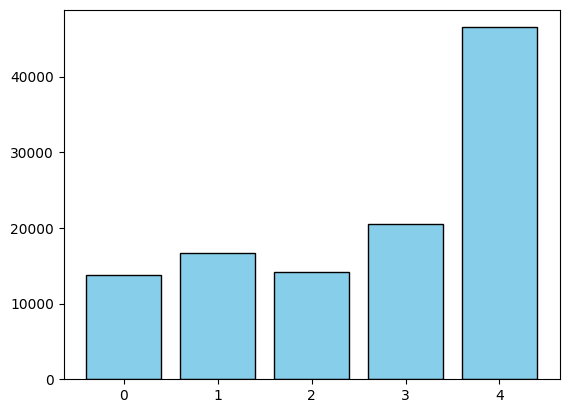

In [ ]:
plt.hist(df1['targe'], bins=range(6), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.show()

In [ ]:
# Create a new column 'target_named' with the names of the classes
class_names = { 0: 'culture', 1: 'diverse', 2: 'economy', 3:'politic', 4: 'sport'}
df1['target_named'] = df1['targe'].map(class_names)

print(df1[['targe', 'target_named']])

        targe target_named
0           0      culture
1           0      culture
2           0      culture
3           0      culture
4           0      culture
...       ...          ...
111723      4        sport
111724      4        sport
111725      4        sport
111726      4        sport
111727      4        sport

[111728 rows x 2 columns]


In [ ]:
df=df1[0:60000]
print(df.head())

                                                text  targe target_named
0  بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...      0      culture
1  قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...      0      culture
2  أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...      0      culture
3  اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...      0      culture
4  تزال صناعة الجلود في المغرب تتبع الطريقة التقل...      0      culture


In [ ]:
df.to_csv('subset_data.csv', index=False)

In [ ]:
df.head()

,text,targe,target_named
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0,culture
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0,culture
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0,culture
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0,culture
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0,culture


In [ ]:
df.dropna(subset = ["text"], inplace=True)

<ipython-input-7-bb67197e9bef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset = ["text"], inplace=True)


In [ ]:
sampled_dfs = []

for target_value in range(5):

    sampled_df = df1[df1['targe'] == target_value].sample(8000, random_state=42)
    sampled_dfs.append(sampled_df)

df_sample = pd.concat(sampled_dfs, ignore_index=True)
df=df_sample

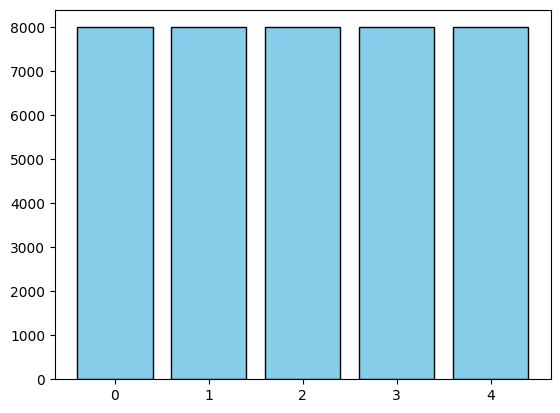

In [ ]:
data = {'df.targe': np.repeat(np.arange(5), 8000)}
df3 = pd.DataFrame(data)
df3['text'] = df1['text']

plt.hist(df['targe'], bins=range(6), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.show()


In [ ]:
def remove_diacritics(x):
    arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    x = str(x)
    x = re.sub(arabic_diacritics, '', x)
    return x

def normalize_arabic(x):
    # Convert www.* or https?://* to " "
    x = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', x)
    # Replace #word with word
    x = re.sub(r'#([^\s]+)', r'\1', x)
    x = re.sub("[إأآا]", "ا", x)
    x = re.sub("ى", "ي", x)
    x = re.sub("ؤ", "ء", x)
    x = re.sub("ئ", "ء", x)
    x = re.sub("ة", "ه", x)
    x = re.sub("گ", "ك", x)

    return x

def remove_punctuations(x):
    punctuations_list = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
    x = str(x)
    translator = str.maketrans(''.join(punctuations_list), ' ' * len(punctuations_list))
    return x.translate(translator)

def remove_repeating_char(x):
    x = str(x)
    return re.sub(r'(.)\1+', r'\1', x)

def remove_english_word_and_numbers(x):
    x = str(x)
    return re.sub(r'[a-zA-Z0-9]+', '', x)

def clean_space(x):
    compiled_re = re.compile(r"\s+")
    return compiled_re.sub(" ", x)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_arabic_stopwords(df, column_name):
    stop_words = set(stopwords.words('arabic'))

    def remove_sw_arabic(text):
        if pd.isnull(text):
            return ''
        words = text.split()
        filtered_words = [word for word in words if word not in stop_words]
        return ' '.join(filtered_words)
    df[column_name] = df[column_name].apply(remove_sw_arabic)
    print(len(stop_words))
    return df

df = remove_arabic_stopwords(df, 'text')

print(df)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


701
                                                    text  targe target_named
0      تحيي الفنانة زهرة هندي حفلا فنيا يوم المقبل بم...      0      culture
1      بلغ عدد المتفرجين حضروا مهرجان البولفار دورته ...      0      culture
2      أخبارنا المغربية متابعة أطلق نشطاء مغاربة حملة...      0      culture
3      أكد المشاركون ندوة دولية انعقدت بمدينة الجديدة...      0      culture
4      تدشن الفنانة الشعبية المغربية نجاة اعتابو ابتد...      0      culture
...                                                  ...    ...          ...
39995  المدربون المغاربة يجتمعون بينهم اليوم لقاء الف...      4        sport
39996  أكد حكيم دومو رئيس عصبة الغرب لكرة القدم الجمع...      4        sport
39997  يرافق المنتخب الوطني الأعضاء الجامعيين باماكو ...      4        sport
39998  أطلسي يطلب فسخ العقد والفريق يجدد عقد الجيلاني...      4        sport
39999  الصحافة المحلية وصفت اللاعبين بـ الأبطال واعتب...      4        sport

[40000 rows x 3 columns]


In [ ]:
import re

def clean_text(df):
    df['text'] =  df['text'].apply(remove_diacritics)
    df['text'] =  df['text'].apply(normalize_arabic)
    df['text'] =  df['text'].apply(remove_punctuations)
    df['text'] =  df['text'].apply(remove_repeating_char)
    df['text'] =  df['text'].apply(remove_english_word_and_numbers)
    df['text'] =  df['text'].apply(clean_space)

    return df

df = clean_text(df)

In [ ]:
df['processed_text']=df['text']

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['processed_text'])
X_train_sequences = tokenizer.texts_to_sequences(df['processed_text'])

maxlen = max(len(seq) for seq in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')

y_train = df['targe'].values[:len(X_train_padded)]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_train_padded, y_train, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))


Training set size: 28000
Validation set size: 6000
Testing set size: 6000


In [ ]:
# Logistic Regression classifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_val = log_reg.predict(X_val)
y_pred_test = log_reg.predict(X_test)

accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Logistic Regression")
print("Validation Accuracy:", accuracy_val)
print("Test Accuracy:", accuracy_test)

Logistic Regression
Validation Accuracy: 0.25155555555555553
Test Accuracy: 0.2431111111111111


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

y_pred_val = rf_classifier.predict(X_val)
y_pred_test = rf_classifier.predict(X_test)

accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Random Forest Classifier")
print("Validation Accuracy:", accuracy_val)
print("Test Accuracy:", accuracy_test)

Random Forest Classifier
Validation Accuracy: 0.45511111111111113
Test Accuracy: 0.4528888888888889


In [ ]:
from tensorflow.keras import layers, Sequential,regularizers,optimizers
import numpy as np
from tensorflow.keras import layers, Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2

model = Sequential([
    layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=300, input_length=maxlen),
    layers.Bidirectional(layers.LSTM(128, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(128)),
    layers.Dropout(0.5),
    layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.Dense(50, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
optimizer =optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer='adam'
         , loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3566, 300)         76469100  
                                                                 
 bidirectional (Bidirection  (None, 3566, 256)         439296    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 3566, 256)         0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 100)               2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

callbacks = [
    ModelCheckpoint('/content/drive/MyDrive/last_LStm.ipynb/model.hdf5', verbose=1, save_best_only=True),
    EarlyStopping(patience=5, verbose=1, restore_best_weights=True, monitor='loss'),
    ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001)
]
history = model.fit(X_train, y_train, epochs=10, batch_size=32 ,callbacks=callbacks, validation_data=(X_val, y_val))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/10
875/875 [==============================] - ETA: 0s - loss: 1.7375 - accuracy: 0.3804
Epoch 1: val_loss improved from inf to 1.02269, saving model to /content/drive/MyDrive/last_LStm.ipynb/model.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


875/875 [==============================] - 670s 739ms/step - loss: 1.7375 - accuracy: 0.3804 - val_loss: 1.0227 - val_accuracy: 0.5897 - lr: 0.0010
Epoch 2/10
875/875 [==============================] - ETA: 0s - loss: 1.1226 - accuracy: 0.5499
Epoch 2: val_loss improved from 1.02269 to 0.87917, saving model to /content/drive/MyDrive/last_LStm.ipynb/model.hdf5
875/875 [==============================] - 640s 731ms/step - loss: 1.1226 - accuracy: 0.5499 - val_loss: 0.8792 - val_accuracy: 0.5863 - lr: 0.0010
Epoch 3/10
875/875 [==============================] - ETA: 0s - loss: 0.8852 - accuracy: 0.5892
Epoch 3: val_loss improved from 0.87917 to 0.79833, saving model to /content/drive/MyDrive/last_LStm.ipynb/model.hdf5
875/875 [==============================] - 654s 748ms/step - loss: 0.8852 - accuracy: 0.5892 - val_loss: 0.7983 - val_accuracy: 0.6372 - lr: 0.0010
Epoch 4/10
875/875 [==============================] - ETA: 0s - loss: 0.7608 - accuracy: 0.6135
Epoch 4: val_loss improved from 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


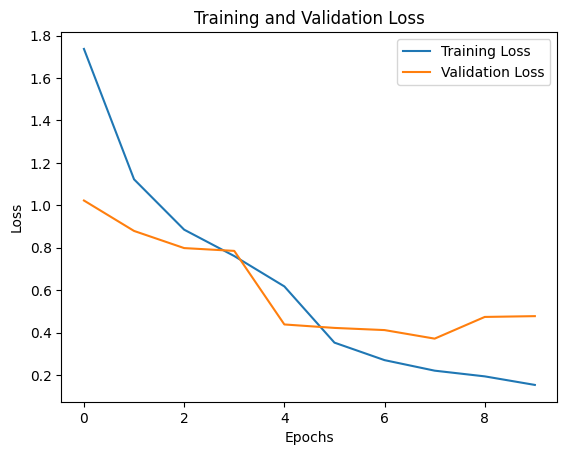

In [ ]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

import matplotlib.pyplot as plt

plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


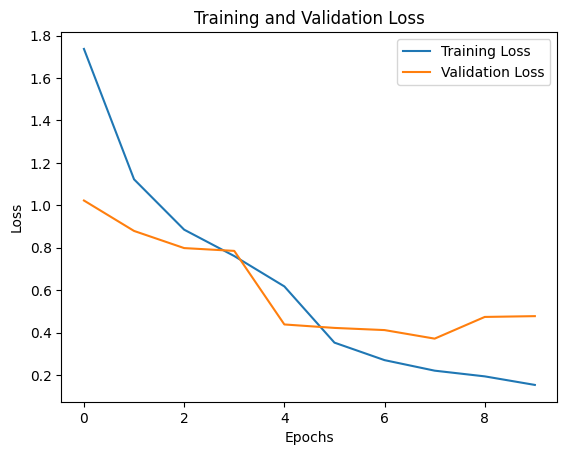

In [ ]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

import matplotlib.pyplot as plt

plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


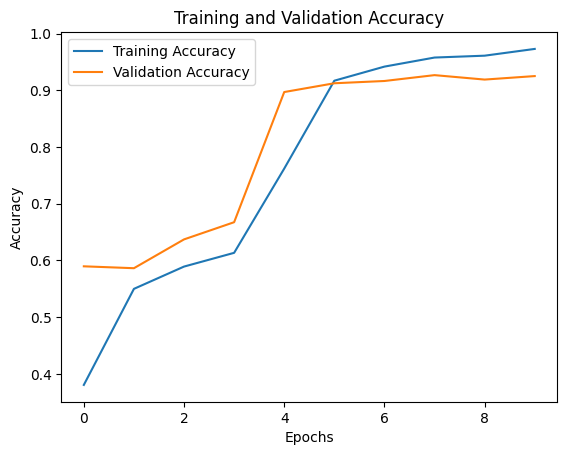

In [ ]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print( loss)
accuracy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


188/188 [==============================] - 35s 185ms/step - loss: 0.4815 - accuracy: 0.9232
0.4815017879009247


0.929111123085022

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val)
print( loss)
accuracy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


188/188 [==============================] - 35s 188ms/step - loss: 0.4774 - accuracy: 0.9253
0.4773886203765869


0.9253333210945129

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


188/188 [==============================] - 36s 181ms/step


In [ ]:
def sequences_to_texts(tokenizer, sequences):

    reverse_word_index = {idx: word for word, idx in tokenizer.word_index.items()}

    texts = []
    for seq in sequences:
        text = ' '.join(reverse_word_index.get(idx, '') for idx in seq if idx != 0)
        texts.append(text)

    return texts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X_test_texts = sequences_to_texts(tokenizer, X_test)
#{ 0: 'culture', 1: 'diverse', 2: 'economy', 3:'politic', 4: 'sport'}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(X_test_texts[4])
print(y_pred_classes[4])

اعلن الفنان القطري فهد الكبيسي عنوان البومه الجديد عشق يتضمن اغنيه جديده اختارها مجموعه كبيره الاغنيات سجلها واكد خلال حساباته الرسميه المختلفه مواقع التواصل الاجتماعي بان اغنيات الالبوم جميعها بات متوفره الايتيونز لمن اراد الاستماع مسبقا عليها طرح الالبوم واوضح الكبيسي بلاغ توصلت الصباح بنسخه الالبوم الجديد تنتجه شركه فهد الكبيسي بروداكشن ”، يحتوي مجموعه متنوعه الالوان الموسيقيه قدمها جميعها باحساسه جهد كبير اعدادها وتنفيذها وتسجيلها متنقلا اجلها عد كبير الاستوديوهات بينها الاستوديو الخاص الدوحه جانب اخري دبي والقاهره والبحرين وتركيا وتم تجهيز الالبوم فنيا وموسيقيا اشراف ومتابعه رفيق درب فهد الكبيسي الملحن القطري عبد اله المناعي شارك تقديم اغنيات الحانه الالبوم اسندت مهمه الاشراف العام ومتابعه تجهيزات طرح العمل لاحمد علي وكيل اعمال الفنان وقد حملت اغنيات الالبوم كلمات الشاعره الاماني جانب الشعراء رياض العوض وراشد بن جعيثن وعبير الشوق واحمد علوي وابراهيم بن سواد وهشام الشروقي وهند ويم وعلي الفضلي وسيف فاضل جانب الملحنين ياسر بوعلي واحمد الهرمي والفيصل ونواف عبد اله وعبد اله المناعي الت

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(X_test_texts[2])
print(y_pred_classes[2])

تمك نت عصابه اجراميه ضمن عرف ب الفراقشيه سرقه عد رءوس الاغنام الساعات الاولي الاحد بدو ار العمامره التابع لجماعه القرويه اولاد عبدون ضواحي مدينه خريبكه بعدما شل حركه المكل بحراسه ورعايه القطيع وافادت مصادر جريده هسبريس الالكترونيه بان الواقفين وراء العمليه حرصوا البدايه تكبيل المكل بالحراسه وانتزاع هاتفه المحمول ينجحوا سرقه شاه باستعمال مركبه رج تكون شاحنه كبيره ويلوذوا بالفرار وجه مجهوله واضافت المصادر ذاتها عناصر امنيه المركز الترابي لدرك الملكي بخريبكه انتقلت مكان الواقعه المعاينه وفتح بحث قضاءي ومباشره التحريات حول عمليات السرقه تستهدف دو ار العمامره الفينه والاخري ضمنها سرقه ثورا اشهر واختفاء شاه شهر الماضي
1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(X_test_texts[5])
print(y_pred_classes[5])

شكلت سفاره المغرب بدمشق خليه استقبال داخل مقرها مكلفه بربط الاتصال بافراد الجاليه المغربيه والاستفسار احوالهم وتقديم المساعدات الازمه حاجه واضعه اليه ماليه بدعم الوزاره المكلفه بالجاليه المغربيه القاطنه بالخارج قصد التكفل بمتابعه احوال المواطنين المغاربه المقيمين بسوريا افادت وكاله المغرب لانباء مصادر بالسفاره المذكوره وتاتي الخطوه ظل التصعيد المسبوق شهدته احداث سوريا مءخرا وحسب المصدر عد المغاربه غادروا سوريا وعادوا ارض الوطن اندلاع الاحداث منتصف شهر الماضي تراوح شخص وقد قامت مصالح السفاره بوضع رقم هاتفي خاص يمكن لافراد الجاليه المغربيه بسوريا الاتصال لاستفسار طلب المساعده الاوقات ايام العطل والاعياد بالاضافه نشر اعلانات الموقع الالكتروني لسفاره تضمن ارقاما هاتفيه ومعلومات مفيده واشار المصدر ذاته مصالح السفاره تبذل جهودا كبيره لتبقي تواصل مستمر افراد الجاليه المغربيه يزالون سوريه رغم الصعوبات تواجها يتعلق بالانقطاعات المتكره لخطوط الهاتف والانترنت والكهرباء وكذا صعوبه الوصول المناطق الساخنه وجدير بالذكر الجاليه المغربيه المقيمه سوريا تكون غالبيتها افراد يمارسون التجاره وبعضهم يعملون ا

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(X_test_texts[6])
print(y_pred_classes[6])

امتلاك ثروه ماليه كبيره يعتبر حلما يراود غالبيه البشر المبتغي يعمي بصيره البعض ويجعلهم ضحيه سهله لعمليات نصب واحتيال والتسويق الشبكي الهرمي نوع جديد الاستثمار الخفي الالكتروني يقوم تسويق منتجات خدمات وبيعها بشكل تواصلي يقوم المستثمر الجديد بالمساهمه راسمال الشركه بمبلغ معين تبقي قيمه مبلغ الاستثمار مفتوحه والي جانب يعمد الوافد الجديد استقطاب ودعوه مساهمين اخرين لدخول ميدان التسويق الشبكي مقابل عموله ولمن سبقوه المجال وذلك بنسبه استفاده مختلفه يحصل المستخدم نسبه حاله قيام عملاءه بجلب مستثمرين ينضمون لسلسله التجاريه بحيث يصبح اعلي قمه الهرم ولديه شبكه الزباءن المشتركين باسفله عملاء بالشراء طريقهم وشد المحامي ذاته القانون يعاقب المخالفات باحكام بالحبس وبالغرامه امكانيه الحكم مرتكبي المخالفه بارجاع المبالغ تم دفعها الزبناء الراضين يمكن لمحكمه تامر بتعليق حكمها نشره نفقه المحكوم بالكيفيه تقرها وختم المحامي بهيءه الرباط بان العقد المضي الكترونيا يعوض العقد المكتوب شريطه استيفاءه لشروط كمطابقه التوقيع لامضاء بخط اليد وغيرها اركان العقود والالتزامات ساره الغزواني قالت دخولها مجال التسويق الشبك

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(X_test_texts[7])
print(y_pred_classes[7])

اطلق المغني المغربي بدري اغنيه سينغل جديده اختار عنوان طوم وجيري كلمات ﻣﺤﻤﺪ اﺷﺮف اديب ولحن محمد الرفاعي التوزيع فهو لموزع الموسيقي رشيد محمد علي ويظهر بدري خلال ملصق الاغنيه بلوك جديد ومختلف خلال تعامله المصور بدر بهجوب والرسوم انجاز بدر هماش الفيديو تصميم زاكي اغنيه طوم وجيري اثارت اعجاب رواد شبكات التواصل الاجتماعي فور طرحها القناه الرسميه بدري خلال استعماله لكلمات خفيفه ولحن وتوزيع جميلين تخرج النمط الساءد حاليا لاغنيه المغربيه والتي اصبحت تلقي انتشارا ونجاحا كبيرين بمختلف اقطار الوطن العربي الجدير بالذكر اغنيه طوم وجيري تاتي النجاح حقته اغنيه حاله حاله والتي عرفت انتشارا واسعا بالدول العربيه الخليج يذكر الفنان بدري مواليد الرباط ينتمي اسره فنيه تربي الموسيقي نعومه اظافره واحترف الغناء سن مبكره خريج المعهد الوطني لموسيقي وسبق المشاركه مهرجان الاغنيه العربيه بالقاهره سنه يختار الاقامه الخليج لاكثر سنوات تنقل خلالها الامارات العربيه المتحده وقطر ومصر وعمان والكويت احيا خلالها العديد السهرات اشتهر بغناءه لكل الالوان الانماط الغناءيه العربيه حفلات كانت تقام بافخم الفنادق بجانب اشهر الفن

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
report = classification_report(y_test, y_pred_classes, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,precision,recall,f1-score,support
0,0.944625,0.961326,0.952903,905.000000
1,0.980392,0.925926,0.952381,918.000000
2,0.910857,0.878721,0.894501,907.000000
3,0.837597,0.891124,0.863532,845.000000
4,0.971215,0.984865,0.977992,925.000000
accuracy,0.929111,0.929111,0.929111,0.929111
macro avg,0.928937,0.928392,0.928262,4500.000000
weighted avg,0.930484,0.929111,0.929400,4500.000000


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_classes)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[1152,   16,   18,   47,   10],
       [  17, 1156,    9,   13,    3],
       [  20,    3, 1021,  112,    8],
       [  35,   36,   84, 1040,    4],
       [   9,    6,    8,    3, 1170]])

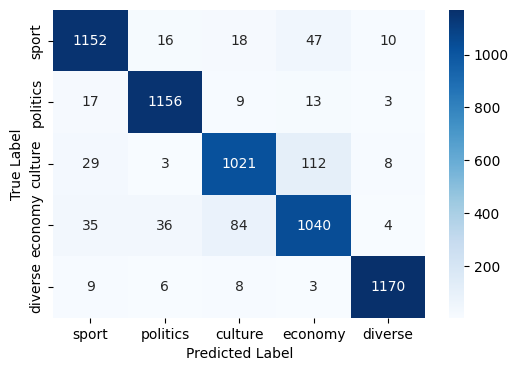

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

values = np.array([
    [1152, 16, 18, 47, 10],
    [17, 1156, 9, 13, 3],
    [29, 3, 1021, 112, 8],
    [35, 36, 84, 1040, 4],
    [9, 6, 8, 3, 1170]
])

labels = ['sport', 'politics', 'culture', 'economy', 'diverse']

plt.figure(figsize=(6, 4))
sns.heatmap(values, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()
